In [38]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [39]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [40]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Dataset Overview

#### Number of rows

In [41]:
print(f"The number of rows of data in the training dateset is {len(df)}")

The number of rows of data in the training dateset is 1296675


#### Number of features

In [42]:
#Number of features excluding target feature
print(f"The is number of features in this dataset is {len(df.columns)-1}")

The is number of features in this dataset is 22


#### Number of duplicated rows

In [43]:
print(f"The number of duplicated rows is {df.duplicated().sum()}")

The number of duplicated rows is 0


#### Feature data types

<Axes: title={'center': 'Data Types'}>

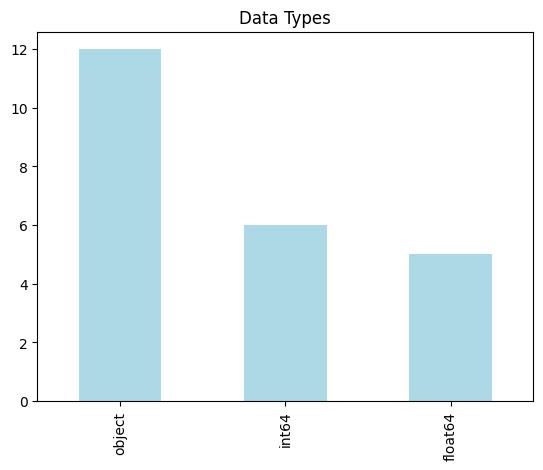

In [44]:
#data types
df.dtypes.value_counts().plot(kind='bar', color='lightblue', title='Data Types')

#### na check

In [45]:
#checking if there are any NA values in the dataset
df.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

#### correlation matrix for continuous features

In [46]:
#correlation matrix for numberical continuous features
df2 = df.drop("Unnamed: 0", axis=1 )
px.imshow(round(df2.select_dtypes('number').corr(),2), color_continuous_scale="RdBu_r", text_auto=True)


# Univariate Analysis

### is_fraud

In [47]:
# fraud distribution
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [48]:
print(f"The percentage of fraud is {round(df['is_fraud'].value_counts()[1] * 100/df['is_fraud'].value_counts().sum(), 2)}%")

The percentage of fraud is 0.58%


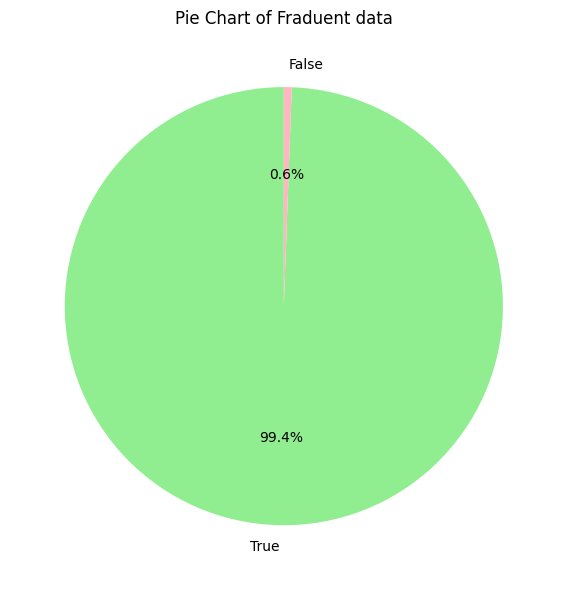

In [49]:
#pie chart
is_fraud_df = df.is_fraud.apply(lambda x: True if x == 0 else False)
is_fraud_counts = is_fraud_df.value_counts()
custom_colors = ['lightgreen', 'lightpink']

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Set the figure size
sns.set_palette(custom_colors)
plt.pie(is_fraud_counts, labels=is_fraud_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Fraduent data')  # Set the title
plt.tight_layout()
plt.show()

### gender

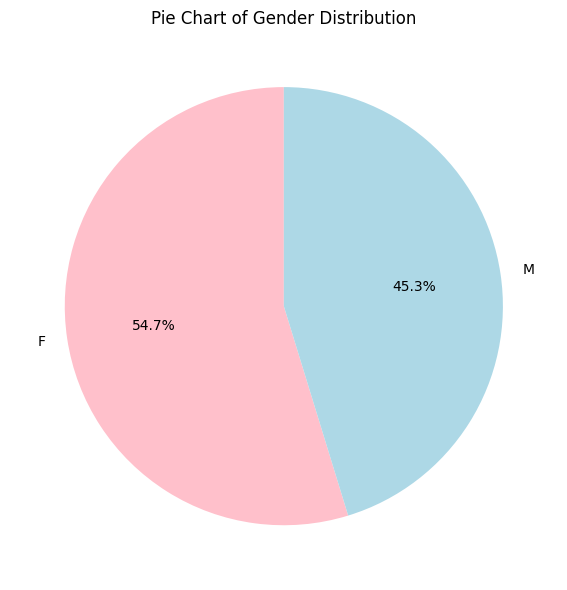

In [50]:
gender_counts = df.gender.value_counts()
custom_colors = ['pink', 'lightblue']

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Set the figure size
sns.set_palette(custom_colors)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Gender Distribution')  # Set the title
plt.tight_layout()
plt.show()

### amt

In [51]:
#numerical summaries
amt_summary = df['amt'].describe()
amt_kurtosis = df['amt'].kurtosis()
amt_skew = df['amt'].skew()
amt_skew_kurtosis = pd.DataFrame({'skew': [round(amt_skew,5)], 'kurtosis': [round(amt_kurtosis,5)]})
amt_summaries = pd.concat([amt_summary,amt_skew_kurtosis.T], axis=0)
amt_summaries.columns = ['Value']
print(amt_summaries)

                 Value
count     1.296675e+06
mean      7.035104e+01
std       1.603160e+02
min       1.000000e+00
25%       9.650000e+00
50%       4.752000e+01
75%       8.314000e+01
max       2.894890e+04
skew      4.227787e+01
kurtosis  4.545645e+03


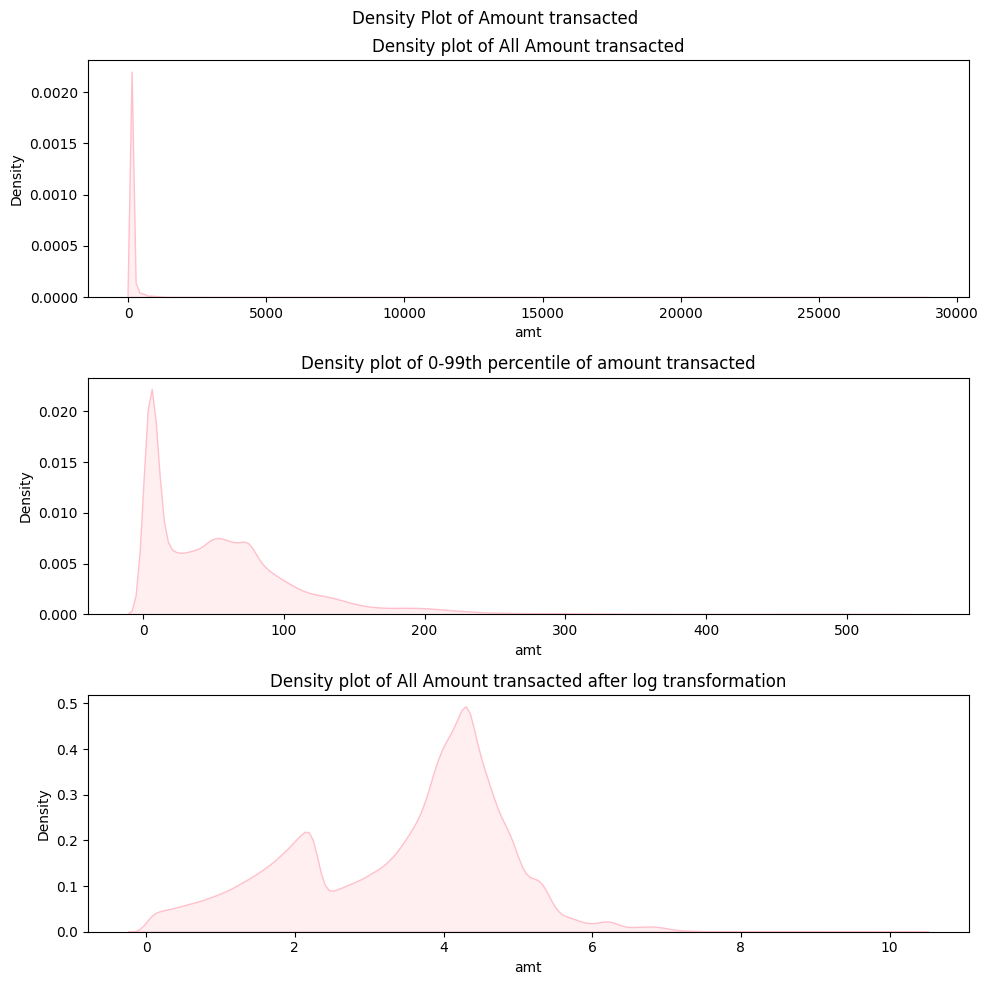

In [52]:
# looking at the density plot for all of the amt datapoints vs 0-99th percentile of datapoints vs log transformation of amt
df_99amt = df[df.amt < df.amt.quantile(0.99)]
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
sns.kdeplot(df.amt, fill=True, ax = axs[0])
sns.kdeplot(df_99amt.amt, fill=True, ax = axs[1])
sns.kdeplot(np.log(df.amt), fill=True, ax = axs[2])
plt.suptitle("Density Plot of Amount transacted")
axs[0].set_title("Density plot of All Amount transacted")
axs[1].set_title("Density plot of 0-99th percentile of amount transacted")
axs[2].set_title("Density plot of All Amount transacted after log transformation")
plt.tight_layout()
plt.show()

### age (self created)

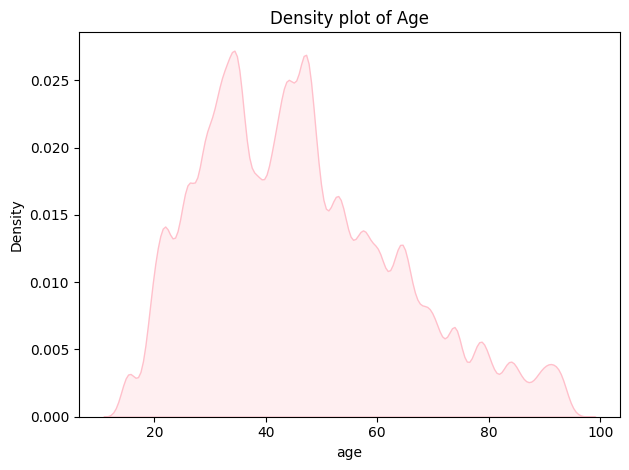

In [53]:
#We create the age feature by finding the difference between date of birth and transaction datetime
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time, format="%Y-%m-%d %H:%M:%S")
df.dob = pd.to_datetime(df.dob, format= "%Y-%m-%d")
df_diff = df['trans_date_trans_time'] - df['dob']
df['age'] = df_diff.apply(lambda x: round(x.days/365,0))

#ploting the density
sns.kdeplot(df.age, fill = True)
plt.title("Density plot of Age")
plt.tight_layout()
plt.show()

### category

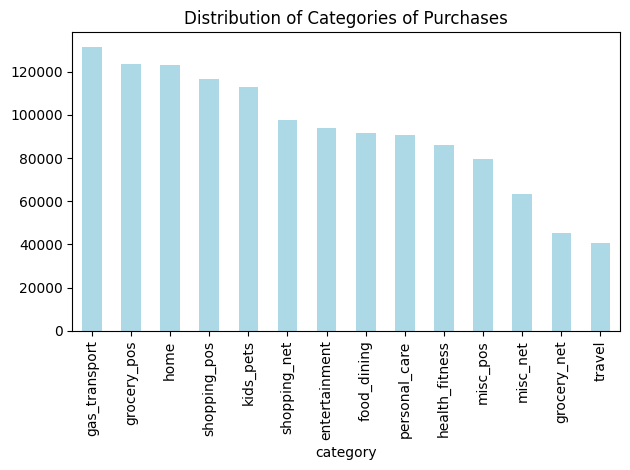

In [54]:
df.category.value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Categories of Purchases')
plt.tight_layout()
plt.show()

### merchant, job, state

In [55]:
print(f'There are {df.merchant.nunique()} number of Merchant providers.\nThere are {df.job.nunique()} number of Jobs.\nThere are {df.state.nunique()} number of States.')

There are 693 number of Merchant providers.
There are 494 number of Jobs.
There are 51 number of States.


### Haversine Distance

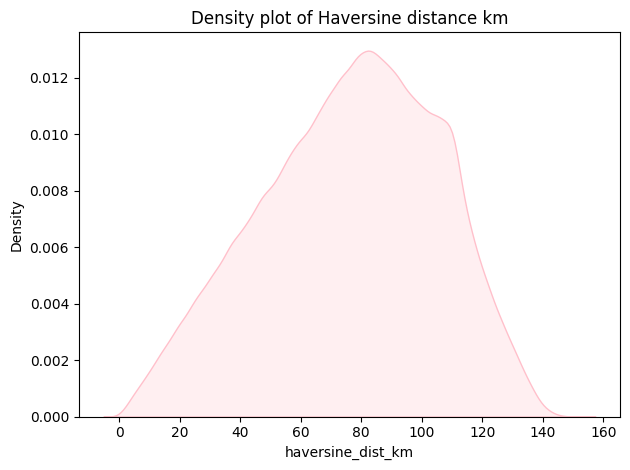

In [56]:
lat1_rad = np.radians(df['merch_lat'])
lat2_rad = np.radians(df['lat'])
lon1_rad = np.radians(df['merch_long'])
lon2_rad = np.radians(df['long'])

dlat = lat2_rad - lat1_rad
dlon = lon2_rad - lon1_rad

a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
c = 2 * np.arcsin(np.sqrt(a))

radius_earth_km = 6371

df['haversine_dist_km'] = radius_earth_km * c

# df['dist_km'] = np.acos( (np.sin(np.radians(df['merch_lat'])) * np.sin(np.radians(df['lat']))) +
#                           (np.cos(np.radians(df['merch_lat'])) * np.cos(np.radians(df['lat'])) * (np.cos(np.radians(df['long']) - np.radians(df['merch_long']))))) * 6371
#df['dist_km'] = np.sqrt(np.square((df['merch_long']-df['long']) * 111 * math.cos(math.radians(df['lat']))) + np.square((df['merch_lat']-df['lat']) * 111))
sns.kdeplot(df.haversine_dist_km, fill = True)
plt.title("Density plot of Haversine distance km")
plt.tight_layout()
plt.show()

### Location of credit card holder and location of merchant by longitude and latitude

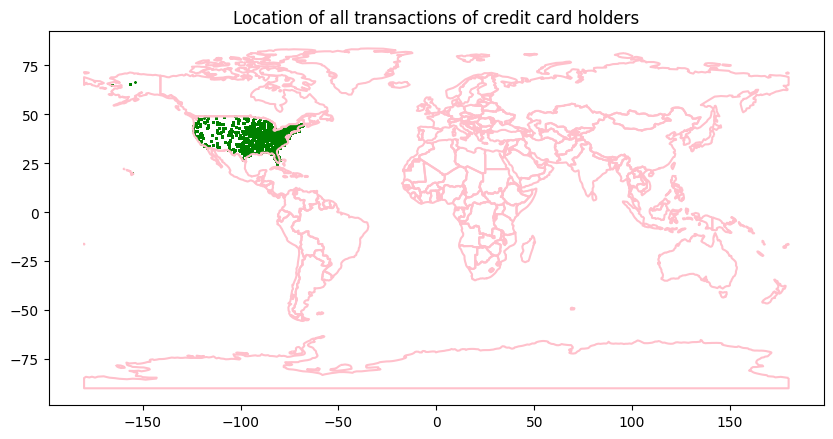

In [57]:
# Create geometry for both GeoDataFrames
geometry_class1 = [Point(xy) for xy in zip(df['long'], df['lat'])]


gdf_class1 = gpd.GeoDataFrame(df, geometry=geometry_class1)

# Load the world map (or any other base map) for reference
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the map with both classes
ax = world.boundary.plot(figsize=(10, 10))
gdf_class1.plot(ax=ax, color='green', markersize=0.1)
plt.title('Location of all transactions of credit card holders')
plt.show()

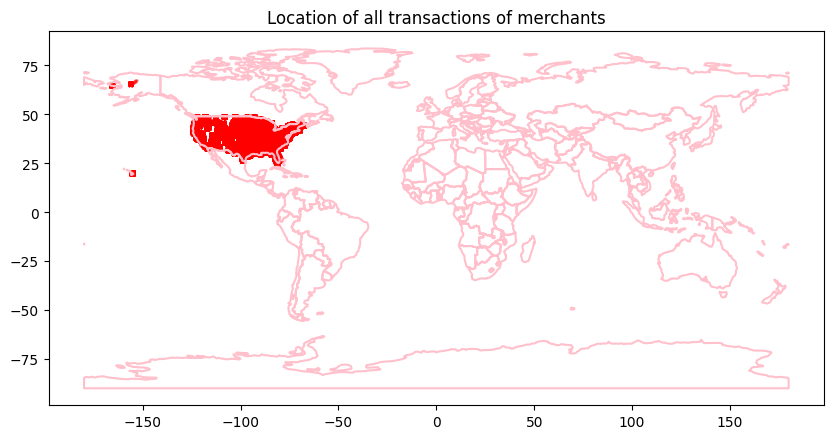

In [58]:
# Create geometry for both GeoDataFrames
geometry_class2 = [Point(xy) for xy in zip(df['merch_long'], df['merch_lat'])]


gdf_class2 = gpd.GeoDataFrame(df, geometry=geometry_class2)

# Load the world map (or any other base map) for reference
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the map with both classes
ax = world.boundary.plot(figsize=(10, 10))
gdf_class2.plot(ax=ax, color='red', markersize=0.1)
plt.title('Location of all transactions of merchants')
plt.show()

We can see that all of the credit card holders and all of the merchants are located in the US

# Bivariate Analysis

### is_fraud vs amt (whole set vs 0-99th percentile)

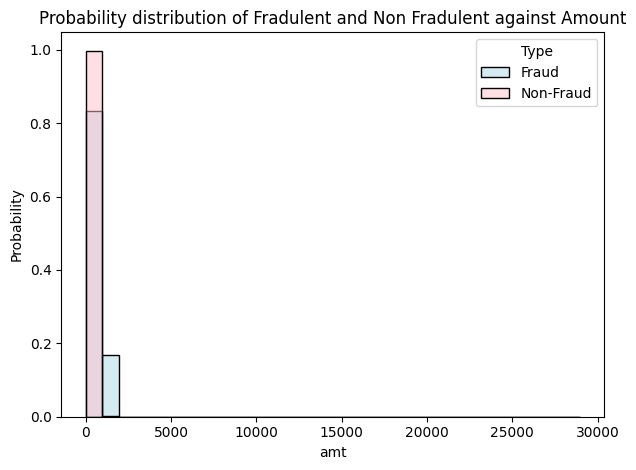

In [59]:
sns.histplot(x='amt', data= df, hue='is_fraud', bins = 30, stat = 'probability',common_norm=False)
plt.title('Probability distribution of Fradulent and Non Fradulent against Amount')
plt.legend(title="Type", labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

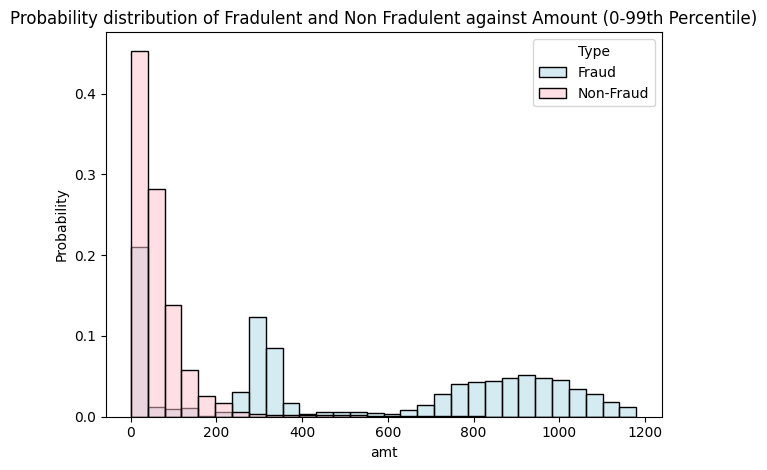

In [60]:
df_fraud = df[df.is_fraud == 1]
df_99amt = df[df.amt < round(df_fraud.amt.quantile(0.99),2)]
sns.histplot(x='amt', data= df_99amt, hue='is_fraud', bins = 30, stat = 'probability',common_norm=False)
plt.title('Probability distribution of Fradulent and Non Fradulent against Amount (0-99th Percentile)')
plt.legend(title="Type", labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

Filtering only for the 0th to 99th percentile, we can see that higher levels of transaction amounts could suggest a higher likelihood of fraud.

### category vs amt (0-99th)

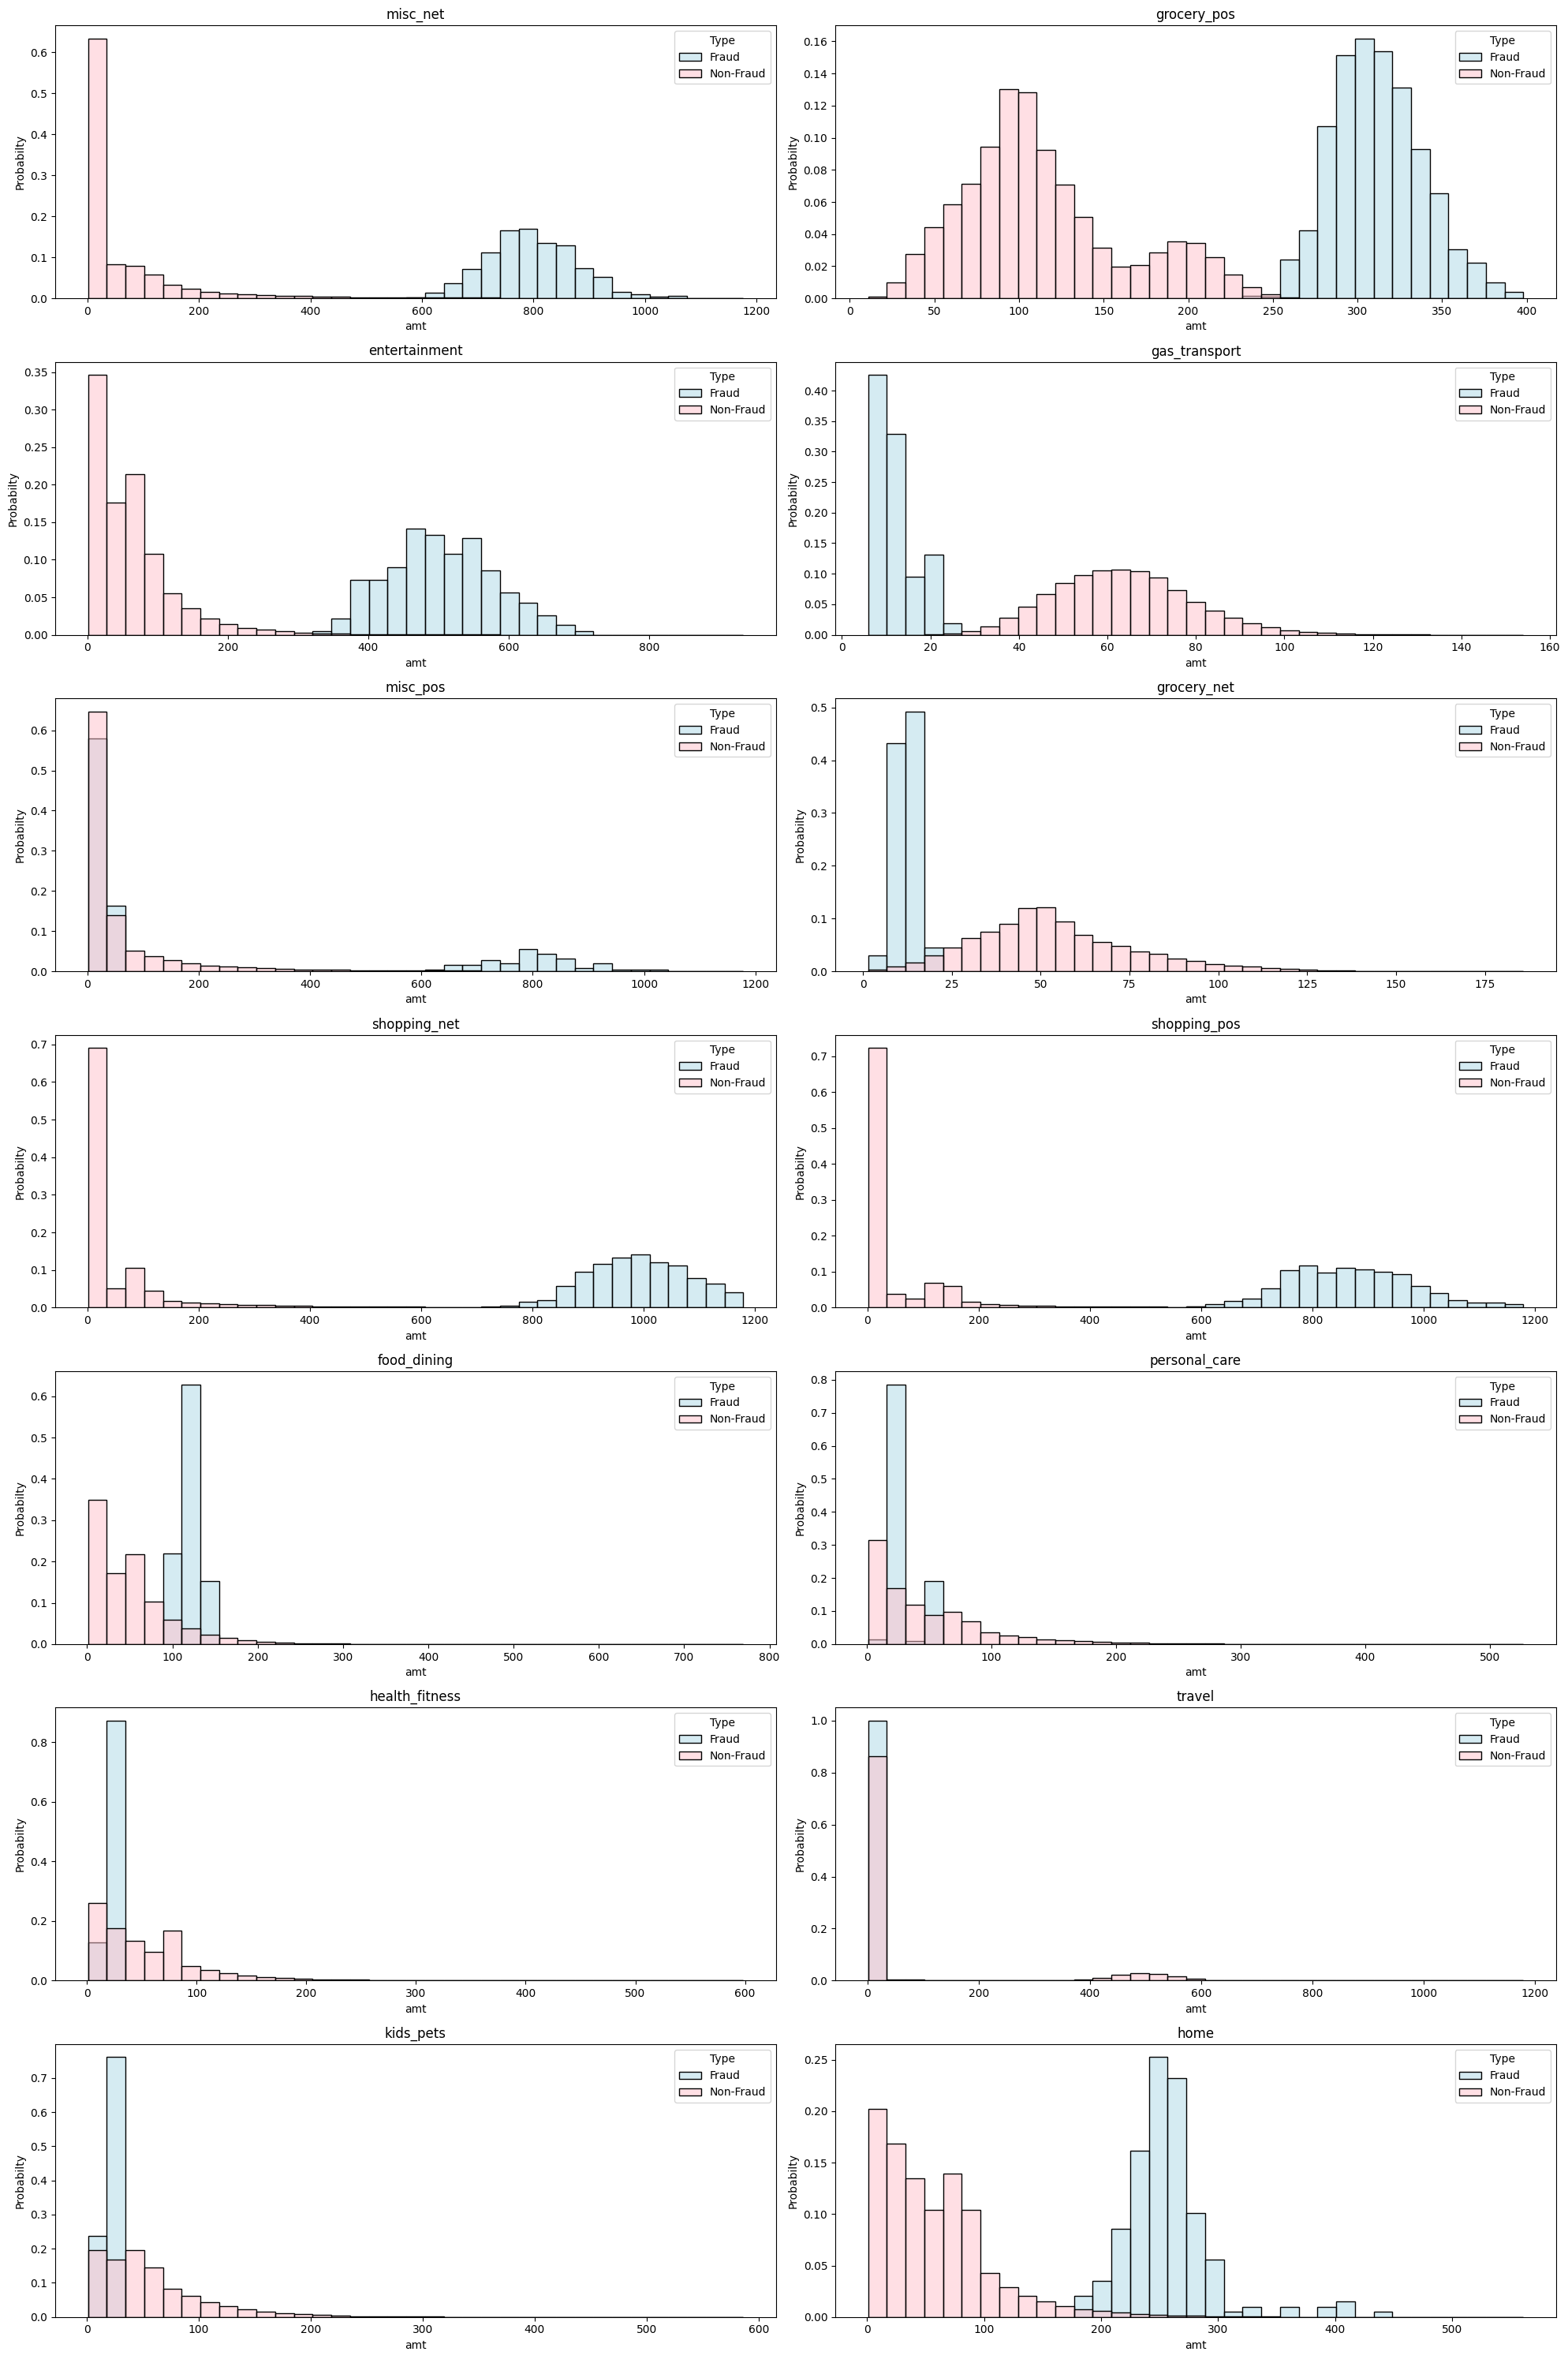

In [61]:
fig, ax = plt.subplots(7,2, figsize=(20,30))
for i, cat in enumerate(df_99amt.category.unique()):
    col = i % 2
    if i%2 == 0:
        row = int(i / 2)
    else:
        row = row
    axs = ax[row, col]
    sns.histplot(x='amt', data = df_99amt[df_99amt.category == cat], hue='is_fraud',common_norm=False,bins=35,stat='probability',palette=custom_colors, ax = axs)
    axs.set_xlabel("amt")
    axs.set_ylabel('Probabilty')
    axs.set_title(f'{cat}')
    axs.legend(title='Type', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

### is_fraud vs category

#### overall distribution of categories for fraudulent transactions

In [62]:
df_fraud_cat = df.groupby('category').is_fraud.mean()*100
df_prop_cat = df_fraud_cat.reset_index()
df_prop_cat.columns = ["Category", "Percentage"]
df_prop_cat = df_prop_cat.sort_values(by='Percentage')
px_fig = px.bar(df_prop_cat, x= "Category", y = "Percentage", color_discrete_sequence= ['lightblue'],
       title = 'Percentage of Fradulent Transaction in each Category')
px_fig.show()

Unexpectedly, most fraudulent transactions occur online as seen by "misc_net" and "shopping_net"

#### Percentage Difference between Fraudulent and Non-Fraudulent transactions per category

In [63]:
df_non_fraud_cat = df[df.is_fraud==0].category.value_counts(normalize=True)
df_fraud_cat = df[df.is_fraud==1].category.value_counts(normalize=True)
df_diff = df_fraud_cat -df_non_fraud_cat
df_diff = df_diff.reset_index()
df_diff.columns = ['category','difference']
df_diff = df_diff.sort_values('difference', ascending=True)
px_fig = px.bar(df_diff,x= 'difference', y='category', color = 'difference', color_continuous_scale="Rdbu_r")
px_fig.update_layout(
    title=dict(text="Percentage Difference between Fradulent and Non-Fraudulent Transaction by Category",
               font=dict(size=12)))
px_fig.show()

### is_fraud vs gender

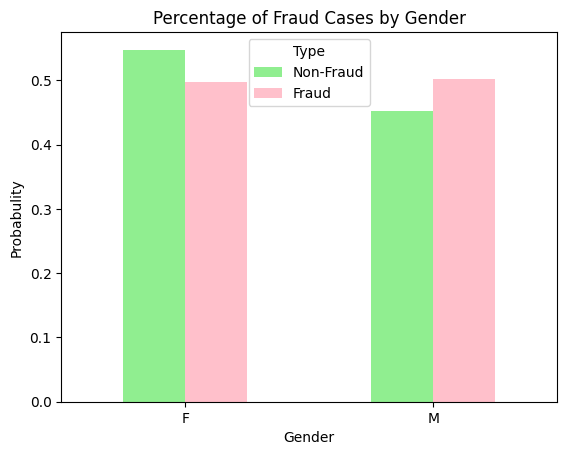

<Figure size 1000x1000 with 0 Axes>

In [64]:
#Bivariate Analysis (Fraud vs Gender)
custom_colors = ['lightgreen', 'pink']
fraud_percentage = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=0)
fraud_percentage.plot(kind='bar', color=custom_colors)
plt.xlabel("Gender")
plt.xticks(rotation=360)
plt.ylabel("Probabulity")
plt.title("Percentage of Fraud Cases by Gender")
plt.legend(title="Type", labels=["Non-Fraud", "Fraud"], loc="upper center")
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()

### is_fraud vs age

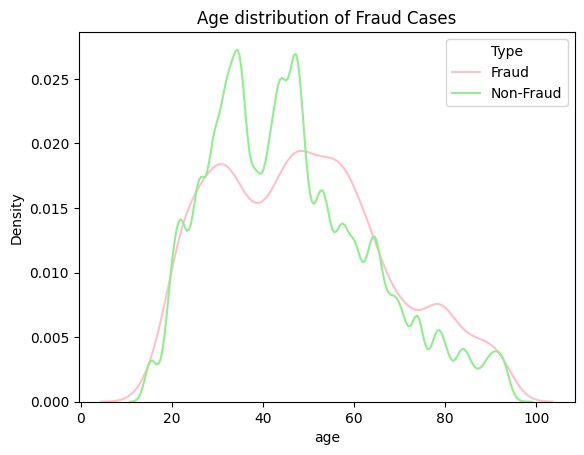

In [65]:
sns.kdeplot(x='age', data = df, hue='is_fraud', common_norm= False, palette = custom_colors)
plt.title("Age distribution of Fraud Cases")
plt.legend(title="Type", labels=["Fraud", "Non-Fraud"], loc="upper right")

### is_fraud vs state
#### Percentage Difference between Fradulent and Non-Fradulent Transaction by State

In [66]:
#Bivariate Analysis (Fraud vs State)
df_non_fraud_state = df[df.is_fraud==0].state.value_counts(normalize=True)
df_fraud_state = df[df.is_fraud==1].state.value_counts(normalize=True)
df_diff = (df_fraud_state -df_non_fraud_state)*100
df_diff = df_diff.reset_index()
df_diff.columns = ['State','Difference']
df_diff = df_diff.sort_values('Difference', ascending=True)
px_fig = px.bar(df_diff,x= 'Difference', y='State', color = 'Difference', color_continuous_scale="Rdbu_r")
px_fig.update_layout(
    title=dict(text="Percentage Difference between Fradulent and Non-Fradulent Transaction by State",
               font=dict(size=12)),
    yaxis= dict(tickfont=dict(size=5)))
px_fig.show()

### month, day, hour (extracted from trans_date_trans_time) vs fraud

In [67]:
df['trans_month'] = df['trans_date_trans_time'].dt.month

df['trans_day'] = df['trans_date_trans_time'].dt.day_of_week

df['trans_hour'] = df['trans_date_trans_time'].dt.hour

#### hour vs is_fraud

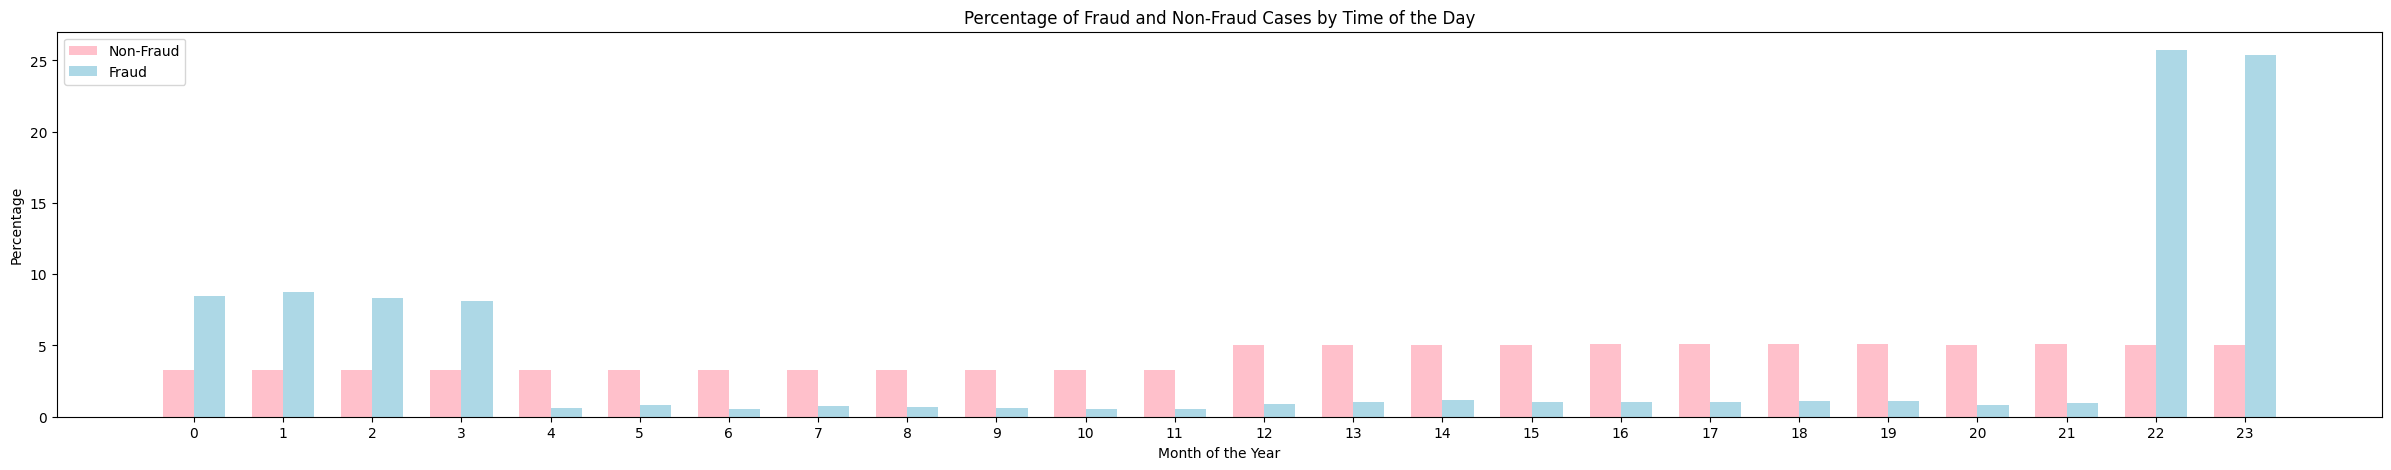

In [73]:
count_by_class = df.groupby('is_fraud').size() 
 
# Group by trans_month and calculate the percentage of fraud and non-fraud cases 
hour_vs_fraud = df.groupby(['trans_hour', 'is_fraud']).size().reset_index(name='count') 
 
count_hour_vs_fraud = hour_vs_fraud.merge(count_by_class.reset_index(name='total_count'), on='is_fraud') 
 
count_hour_vs_fraud['percentage'] = (count_hour_vs_fraud['count'] / count_hour_vs_fraud['total_count']) * 100 
 
# Pivot the DataFrame for plotting 
pivot_df = count_hour_vs_fraud.pivot(index='trans_hour', columns='is_fraud', values='percentage').fillna(0) 
 
# Plot the grouped bar chart 
width = 0.35  # Width of the bars 
fig, ax = plt.subplots(figsize=(30, 5)) 
 
bar1 = ax.bar(pivot_df.index - width/2, pivot_df[0], width, label='Non-Fraud') 
bar2 = ax.bar(pivot_df.index + width/2, pivot_df[1], width, label='Fraud') 
 
# Add labels, title, and legend 
ax.set_xlabel('Month of the Year') 
ax.set_ylabel('Percentage') 
ax.set_title('Percentage of Fraud and Non-Fraud Cases by Time of the Day') 
ax.set_xticks(pivot_df.index) 
ax.legend() 
 
# Show the plot 
plt.show()

We can see that from 22h to 03h, there is significantly more fraudulent transactions occurring. Making it potentially useful as a feature.

#### day vs is_fraud

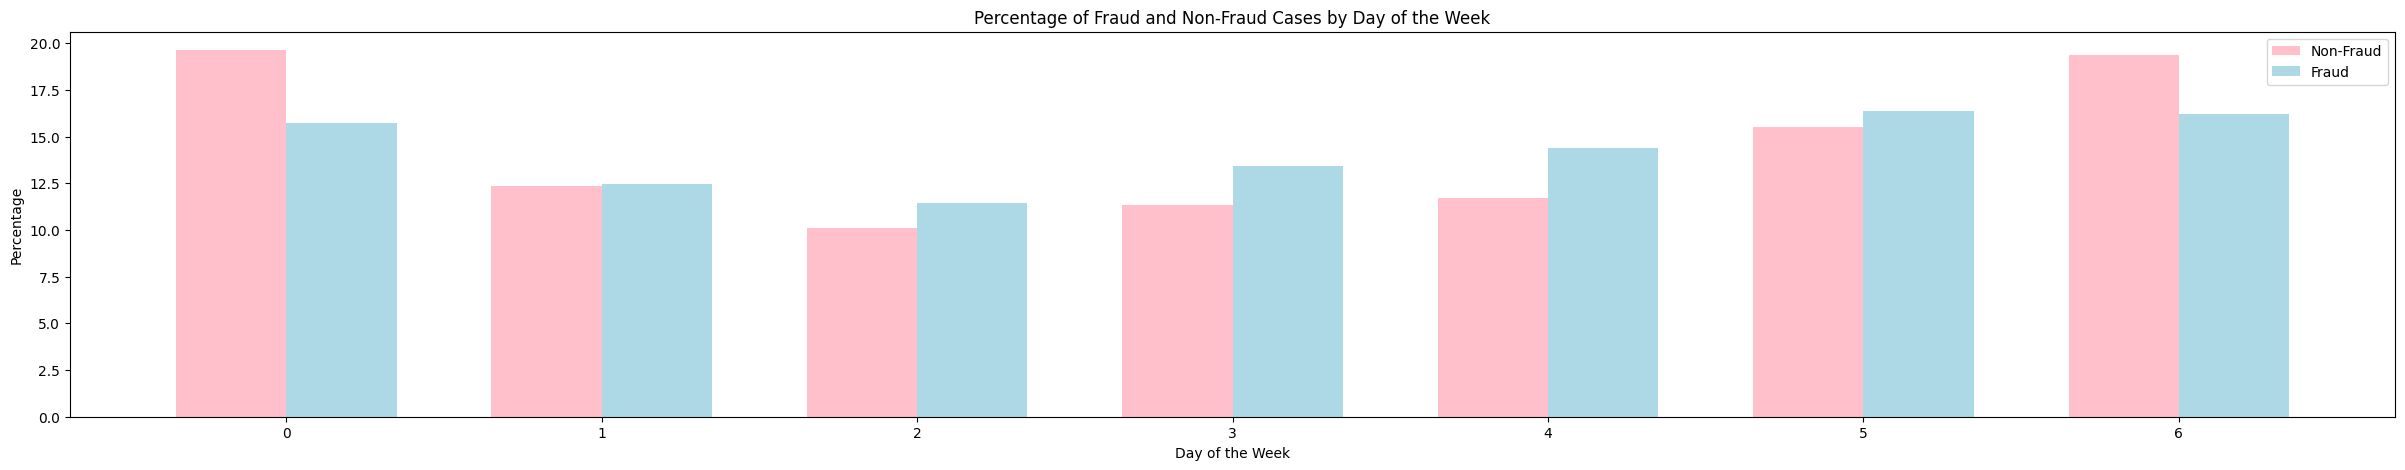

In [71]:
count_by_class = df.groupby('is_fraud').size() 
 
# Group by trans_day and calculate the percentage of fraud and non-fraud cases 
day_vs_fraud = df.groupby(['trans_day', 'is_fraud']).size().reset_index(name='count') 
 
count_day_vs_fraud = day_vs_fraud.merge(count_by_class.reset_index(name='total_count'), on='is_fraud') 
 
count_day_vs_fraud['percentage'] = (count_day_vs_fraud['count'] / count_day_vs_fraud['total_count']) * 100 
 
# Pivot the DataFrame for plotting 
pivot_df = count_day_vs_fraud.pivot(index='trans_day', columns='is_fraud', values='percentage').fillna(0) 
 
# Plot the grouped bar chart 
width = 0.35  # Width of the bars 
fig, ax = plt.subplots(figsize=(30, 5)) 
 
bar1 = ax.bar(pivot_df.index - width/2, pivot_df[0], width, label='Non-Fraud') 
bar2 = ax.bar(pivot_df.index + width/2, pivot_df[1], width, label='Fraud') 
 
# Add labels, title, and legend 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Percentage') 
ax.set_title('Percentage of Fraud and Non-Fraud Cases by Day of the Week') 
ax.set_xticks(pivot_df.index) 
ax.legend() 
 
# Show the plot 
plt.show()

We can only see that fraudulent transaction occurs more on Saturday, Sunday and Monday.

#### month vs is_fraud

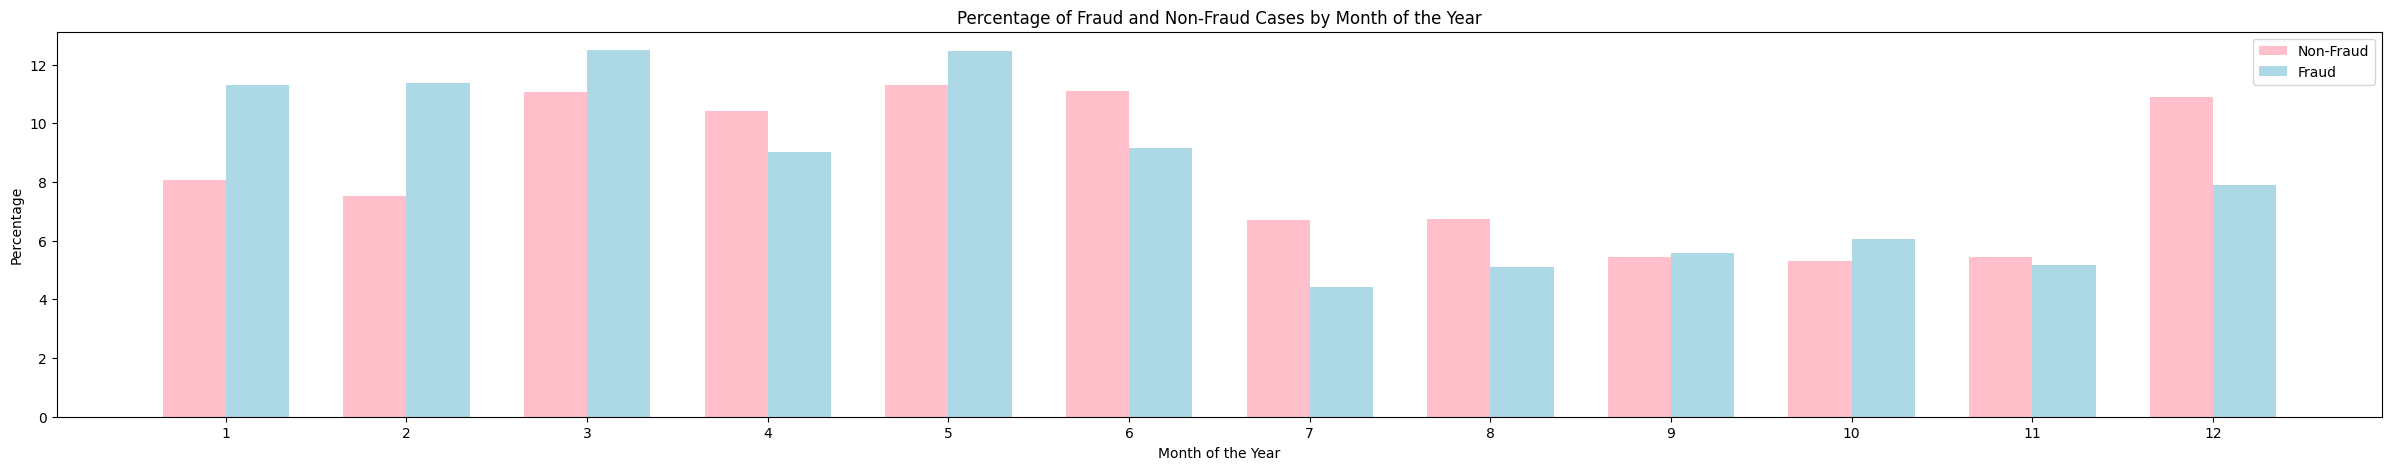

In [72]:
count_by_class = df.groupby('is_fraud').size() 
 
# Group by trans_month and calculate the percentage of fraud and non-fraud cases 
month_vs_fraud = df.groupby(['trans_month', 'is_fraud']).size().reset_index(name='count') 
 
count_month_vs_fraud = month_vs_fraud.merge(count_by_class.reset_index(name='total_count'), on='is_fraud') 
 
count_month_vs_fraud['percentage'] = (count_month_vs_fraud['count'] / count_month_vs_fraud['total_count']) * 100 
 
# Pivot the DataFrame for plotting 
pivot_df = count_month_vs_fraud.pivot(index='trans_month', columns='is_fraud', values='percentage').fillna(0) 
 
# Plot the grouped bar chart 
width = 0.35  # Width of the bars 
fig, ax = plt.subplots(figsize=(30, 5)) 
 
bar1 = ax.bar(pivot_df.index - width/2, pivot_df[0], width, label='Non-Fraud') 
bar2 = ax.bar(pivot_df.index + width/2, pivot_df[1], width, label='Fraud') 
 
# Add labels, title, and legend 
ax.set_xlabel('Month of the Year') 
ax.set_ylabel('Percentage') 
ax.set_title('Percentage of Fraud and Non-Fraud Cases by Month of the Year') 
ax.set_xticks(pivot_df.index) 
ax.legend() 
 
# Show the plot 
plt.show()

We can see that more fraudulent transactions occur in the first half of the year.